In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=12)

safediv(x, y) = x == 0 ? zero(x/y) : x/y

function pvalue_wilson(k, n, p)
    bin = Binomial(n, p)
    μ, σ = mean(bin), std(bin)
    z = safediv(k - μ, σ)
    2ccdf(Normal(), abs(z))
end

function sim(; p=1/2, nmin=1, nmax=1000, α=0.05, pvalue=pvalue_wilson, L=10^5)
    ber = Bernoulli(p)
    nstop = fill(nmax + 1, L)
    Threads.@threads for i in 1:L
        k = rand(Binomial(nmin - 1, p))
        for n in nmin:nmax
            k += rand(ber)
            if pvalue(k, n, p) < α
                nstop[i] = n
                break
            end
        end
    end
    nstop
end

sim (generic function with 1 method)

nmin = 100
nmax = 300
mean((≤)(nmax), nstop) = 0.20417
quantile(nstop, 0.05) = 100.0


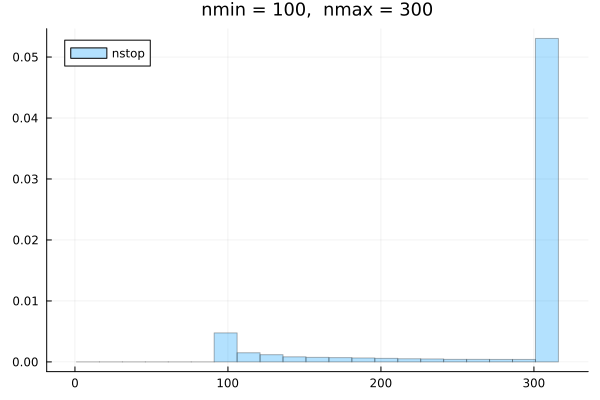

In [2]:
nmin = 100
nmax = 300
nstop = sim(; nmin, nmax)
@show nmin nmax mean(≤(nmax), nstop) quantile(nstop, 0.05)
binstep = nmax ÷ 20
histogram(nstop; norm=true, label="nstop", alpha=0.3, bin=1:binstep:nmax+binstep+1)
title!("nmin = $nmin,  nmax = $nmax")

nmin = 100
nmax = 1000
mean((≤)(nmax), nstop) = 0.31766
quantile(nstop, 0.05) = 100.0


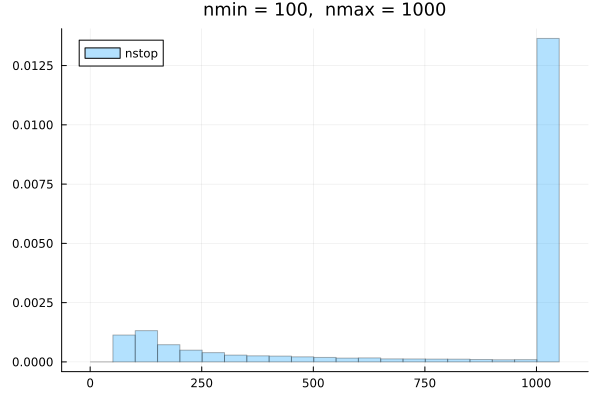

In [3]:
nmin = 100
nmax = 1000
nstop = sim(; nmin, nmax)
@show nmin nmax mean(≤(nmax), nstop) quantile(nstop, 0.05)
binstep = nmax ÷ 20
histogram(nstop; norm=true, label="nstop", alpha=0.3, bin=1:binstep:nmax+binstep+1)
title!("nmin = $nmin,  nmax = $nmax")

nmin = 100
nmax = 3000
mean((≤)(nmax), nstop) = 0.40788
quantile(nstop, 0.05) = 100.0


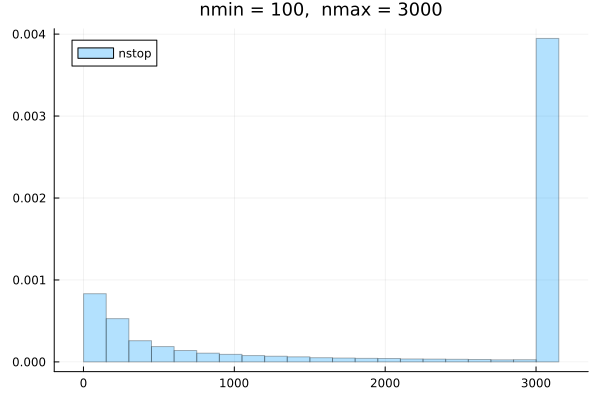

In [4]:
nmin = 100
nmax = 3000
nstop = sim(; nmin, nmax)
@show nmin nmax mean(≤(nmax), nstop) quantile(nstop, 0.05)
binstep = nmax ÷ 20
histogram(nstop; norm=true, label="nstop", alpha=0.3, bin=1:binstep:nmax+binstep+1)
title!("nmin = $nmin,  nmax = $nmax")

nmin = 100
nmax = 10000
mean((≤)(nmax), nstop) = 0.49425
quantile(nstop, 0.05) = 100.0


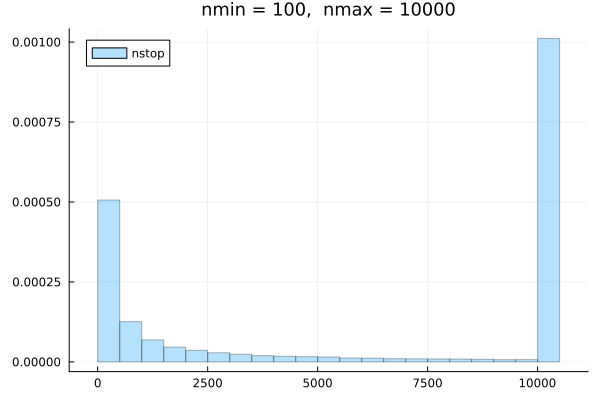

In [5]:
nmin = 100
nmax = 10000
nstop = sim(; nmin, nmax)
@show nmin nmax mean(≤(nmax), nstop) quantile(nstop, 0.05)
binstep = nmax ÷ 20
histogram(nstop; norm=true, label="nstop", alpha=0.3, bin=1:binstep:nmax+binstep+1)
title!("nmin = $nmin,  nmax = $nmax")